# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Last Name, First Name)_: GERALDINO, Simon Paul Andrew\
_Student No._: 2020-11068\
_Section_: THU-HX 1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Simon Paul Andrew M. Geraldino

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

### Integration using Trapezoidal Rule


In [ ]:
# Integration using the Trapezoidal rule with 10, 100, and 1000 slices

# This will be used to define the polynomial function
def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5

# These are the bounds for the integration, with a as the lower bound and b as the upper bound
a = 0
b = 5

# This is used for setting up the number of slices used in the integration
for i in range(1,4):

    # This variable is set as the number of slices
    N = 10**i

    # This is the width of each slice in the integration
    h = (b - a)/N

    # Setting up the sum for the integration
    s = 0.5*f(a) + 0.5*f(b)

    # This repeatedly adds values of s from k=1 to k=N-1
    for k in range(1,N):
        s += f(a+k*h)

    # The answer of the trapezoidal integration
    I_trap = h*s

    # The answer after computing the integration by hand.
    I_theo = 1450

    # Calculating the percent error of I_trap compared to I_theo
    P_error_trap = (I_trap - I_theo)/I_theo*100

    print("Number of slices = " + str(N))
    print("Integration answer = " + str(I_trap))
    print("Percent error = " + str(P_error_trap) + "\n")

Number of slices = 10
Integration answer = 1471.4375
Percent error = 1.478448275862069

Number of slices = 100
Integration answer = 1450.2145812500003
Percent error = 0.014798706896569988

Number of slices = 1000
Integration answer = 1450.0021458331234
Percent error = 0.00014798849127240326



### Integration using Simpson's Rule

In [ ]:
# Integration using the Simpson's rule with 10, 100, 1000 slices

# This will be used to define the polynomial function
def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5

# These are the bounds for the integration, with a as the lower bound and b as the upper bound
a = 0
b = 5

# This is used for setting up the number of slices used in the integration
for i in range(1,4):

    # This variable is set as the number of slices
    N = 10**i

    # This is the width of each slice in the integration
    h = (b - a)/N

    # Setting up the sum for the integration
    s = f(a) + f(b)

    # This repeatedly adds odd values of k to s
    for k in range(1, N, 2):
        s += 4*f(a+k*h)

    # This repeatedly adds even values of k to s
    for k in range(2, N, 2):
        s += 2*f(a+k*h)

    # The answer of the Simpson's integration
    I_simp = 1/3*h*s

    # The answer after computing the integration by hand.
    I_theo = 1450

    # Calculating the percent error of I_simp compared to I_theo
    P_error_simp = (I_simp - I_theo)/I_theo*100

    print("The number of slices used is " + str(N))
    print(I_simp)
    print("The percent error is " + str(P_error_simp) + "\n")

The number of slices used is 10
1450.0833333333333
The percent error is 0.005747126436776382

The number of slices used is 100
1450.0000083333337
The percent error is 5.747126657485657e-07

The number of slices used is 1000
1450.000000000834
The percent error is 5.75176994155707e-11



## Additional Info:

For both these rules of integration, we can see that the answer we get from the different calculations, with differing N slices, that the percent error becomes lower when N is bigger. If we look at the percent errors with more depth, we can see that the errors in Trapezoidal Rule decrease with the factor of N^2 while the Simpson's Rule decrease with the factor N^4.

Additionally, after looking at both the percent errors of these rules, we can see that the Simpson's Rule has shown a more accurate answer due to its lower percent error compared to the other rule.

### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [ ]:
# We define the function gaussxw from Appendex E of the Newman text

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomnila
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using the Newton's method
    epsilon = 1e-15
    delta = 1.0

    while delta > epsilon:
        p0 = ones(N,float)
        p1 = copy(x)

        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

In [ ]:
# This is for the integration of the function using Gaussian quadrature

# This will be used to define the polynomial function
def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5

# The number of slices stated in the problem
N = 3

# These are the bounds for the integration, with a as the lower bound and b as the upper bound
a = 0
b = 5

# We will use this to calculate the sample points and weights, and map the values to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Setting the initial value of the sum to zero
s = 0.

# The integration is performed here by adding N number instances to s
for k in range(N):
    s += wp[k]*f(xp[k])

print("The Integration answer by using the Gaussian quadrature is " + str(s) + "\n")

print("The percent error is " + str((s-I_theo)/s*100))

The Integration answer by using the Gaussian quadrature is 1450.000000000002

The percent error is 1.4112848820614384e-13


I added a percent error in the answer to see how much is the difference of the answer you get in the Gaussian quadrature when compared to the "by-hand" answer, seen in I_theo. We can see that this answer, represented by the variable s, is more accurate than the previous rules used for integration. As an experiment, I changed N value multiple times and observed that the integration answer we get from N=3 does not really change much when N is increased.

### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

In [ ]:
# This will be used to define the potential function
def V(x):
    return x**4

# This will be used to define the period function, before integration
# Variables used: x = position; m = mass; A = amplitude
def P(x, m, A):
    return np.sqrt(8*m)/np.sqrt(V(A)-V(x))

# This will be used to define the period, after the integration
# Variable used: a = lower bound; b = upper bound; N = number of slices; m = mass
def T(a, b, N, m):

    # We will use this to calculate the sample points and weights, and map the values to the required integration domain
    x,w = gaussxw(N)
    xp = 0.5*(b-a)*x+0.5*(b+a)
    wp = 0.5*(b-a)*w

    # Setting the initial value of the sum to zero
    s = 0.

    # The integration is performed here by adding N number instances to s
    for k in range(N):
        s += wp[k]*P(xp[k], m, b)

    return s

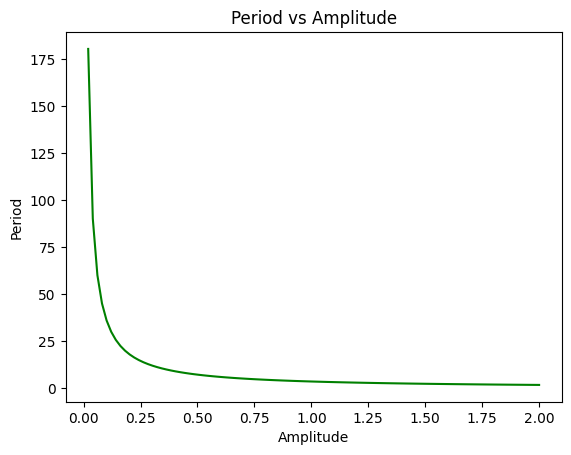

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# We will set an array of amplitudes
A = np.linspace(0,2,100)

# We will set an empty array for the period graph
T_arr = [None]

# We will use this to create multiple values of the period for the graph later
for i in np.arange(99):
    T_arr = np.append(T_arr, T(0, A[i+1], 20, 1))

# This will used for creating the figures and axes
fig, ax = plt.subplots()

# We will now create the graph using the amplitude value and its corresponding period
ax.plot(A[1:], T_arr[1:], 'g')
ax.set(title = 'Period vs Amplitude',
       ylabel = 'Period',
       xlabel = 'Amplitude')

# We will now show the graph
plt.show()

In this plot, we see that there is a logarithmic progression between the amplitude and the period. This relationship is seen as the period decreases while the amplitude is increased.

When the upper bound of integration for the Period is increased, we will still see this logarithmic line, which makes the small difference seen in the given bounds of integration is enough to have a gist the overall relationship and graph of the amplitude and the period.